# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
from pandas.api.types import (is_numeric_dtype,
                              CategoricalDtype)
from scipy import stats

# Load Dataset

In [2]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head().T

,0,1,2,3,4
person_age,22.0,21.0,25.0,23.0,24.0
person_gender,female,female,female,female,male
person_education,Master,High School,High School,Bachelor,Master
person_income,71948.0,12282.0,12438.0,79753.0,66135.0
person_emp_exp,0,0,3,0,1
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
loan_amnt,35000.0,1000.0,5500.0,35000.0,35000.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_percent_income,0.49,0.08,0.44,0.44,0.53


# Data Inspection

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<ul>
<li>The dataset is clean and completed without any missing value </li>
<li>Variables are comprehended in correct format with little action needed to be done </li>
<li> The dataset consists 45,000 entries in total. This includes 14 features with demographic informations such (age, gender, income, etc.), loan details (amount, intention, approval), and financial record(credit score, credit history)
</ul>

In [4]:
data_description = pd.DataFrame({
    'Type': loan_data.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if var==object else 'Quantitative' for var, col in zip(loan_data.dtypes, loan_data.columns)],
    'Uniques': [len(loan_data[col].unique()) if dtype==object or col.find('loan_status')>=0  else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Min': [loan_data[col].min() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Max': [loan_data[col].max() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Avg':  [loan_data[col].mean() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Std': [loan_data[col].std().round(1) if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)], 
    'Missing': [loan_data[col].isnull().sum() for col in loan_data.columns]
}).sort_values(by='Qualitative/Quantitative')

data_description

,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
person_gender,object,Qualitative,2,-,-,-,-,0
person_education,object,Qualitative,5,-,-,-,-,0
person_home_ownership,object,Qualitative,4,-,-,-,-,0
loan_intent,object,Qualitative,6,-,-,-,-,0
previous_loan_defaults_on_file,object,Qualitative,2,-,-,-,-,0
person_age,float64,Quantitative,-,20.0,144.0,27.764178,6.0,0
person_income,float64,Quantitative,-,8000.0,7200766.0,80319.053222,80422.5,0
person_emp_exp,int64,Quantitative,-,0,125,5.410333,6.1,0
loan_amnt,float64,Quantitative,-,500.0,35000.0,9583.157556,6314.9,0
loan_int_rate,float64,Quantitative,-,5.42,20.0,11.006606,3.0,0


<ul>
<li> There are 5 Qualitative variables in total, all can be treated as <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>categorial/ordinal </span> data. Additionally, there are 9 quantitative varialbes. Among these, <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_int_rate</i> is expressed as percentage ranging from roughly 5% to 20%, while <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_percent_income</i> is expressed as decimal value from 0 to 1 as percentage of loan over income. </li>
<li> <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_status</i> is presented as integer 0 indicating rejection and 1 indicating approval of the loan

In [5]:
for col in loan_data.select_dtypes(include='object').columns:
    print(f'Unique values in {col}: {loan_data[col].unique()}')

Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in previous_loan_defaults_on_file: ['No' 'Yes']


In [6]:
#Converting Quanlitative data to categorical data
education_ordinal = CategoricalDtype(categories=['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'], ordered=True)
loan_data['person_education'] = loan_data['person_education'].astype(education_ordinal)
ownership_ordinal = CategoricalDtype(categories=['OTHER','RENT', 'MORTGAGE', 'OWN'], ordered=True)
loan_data['person_home_ownership'] = loan_data['person_home_ownership'].astype(ownership_ordinal)
loan_data[['person_gender','loan_intent','previous_loan_defaults_on_file']] = loan_data[['person_gender','loan_intent','previous_loan_defaults_on_file']].astype('category')

# Descriptive Analysis

In [7]:
loan_status_colors = {
    1: '#FFB266',
    0: '#85c1e9'
}

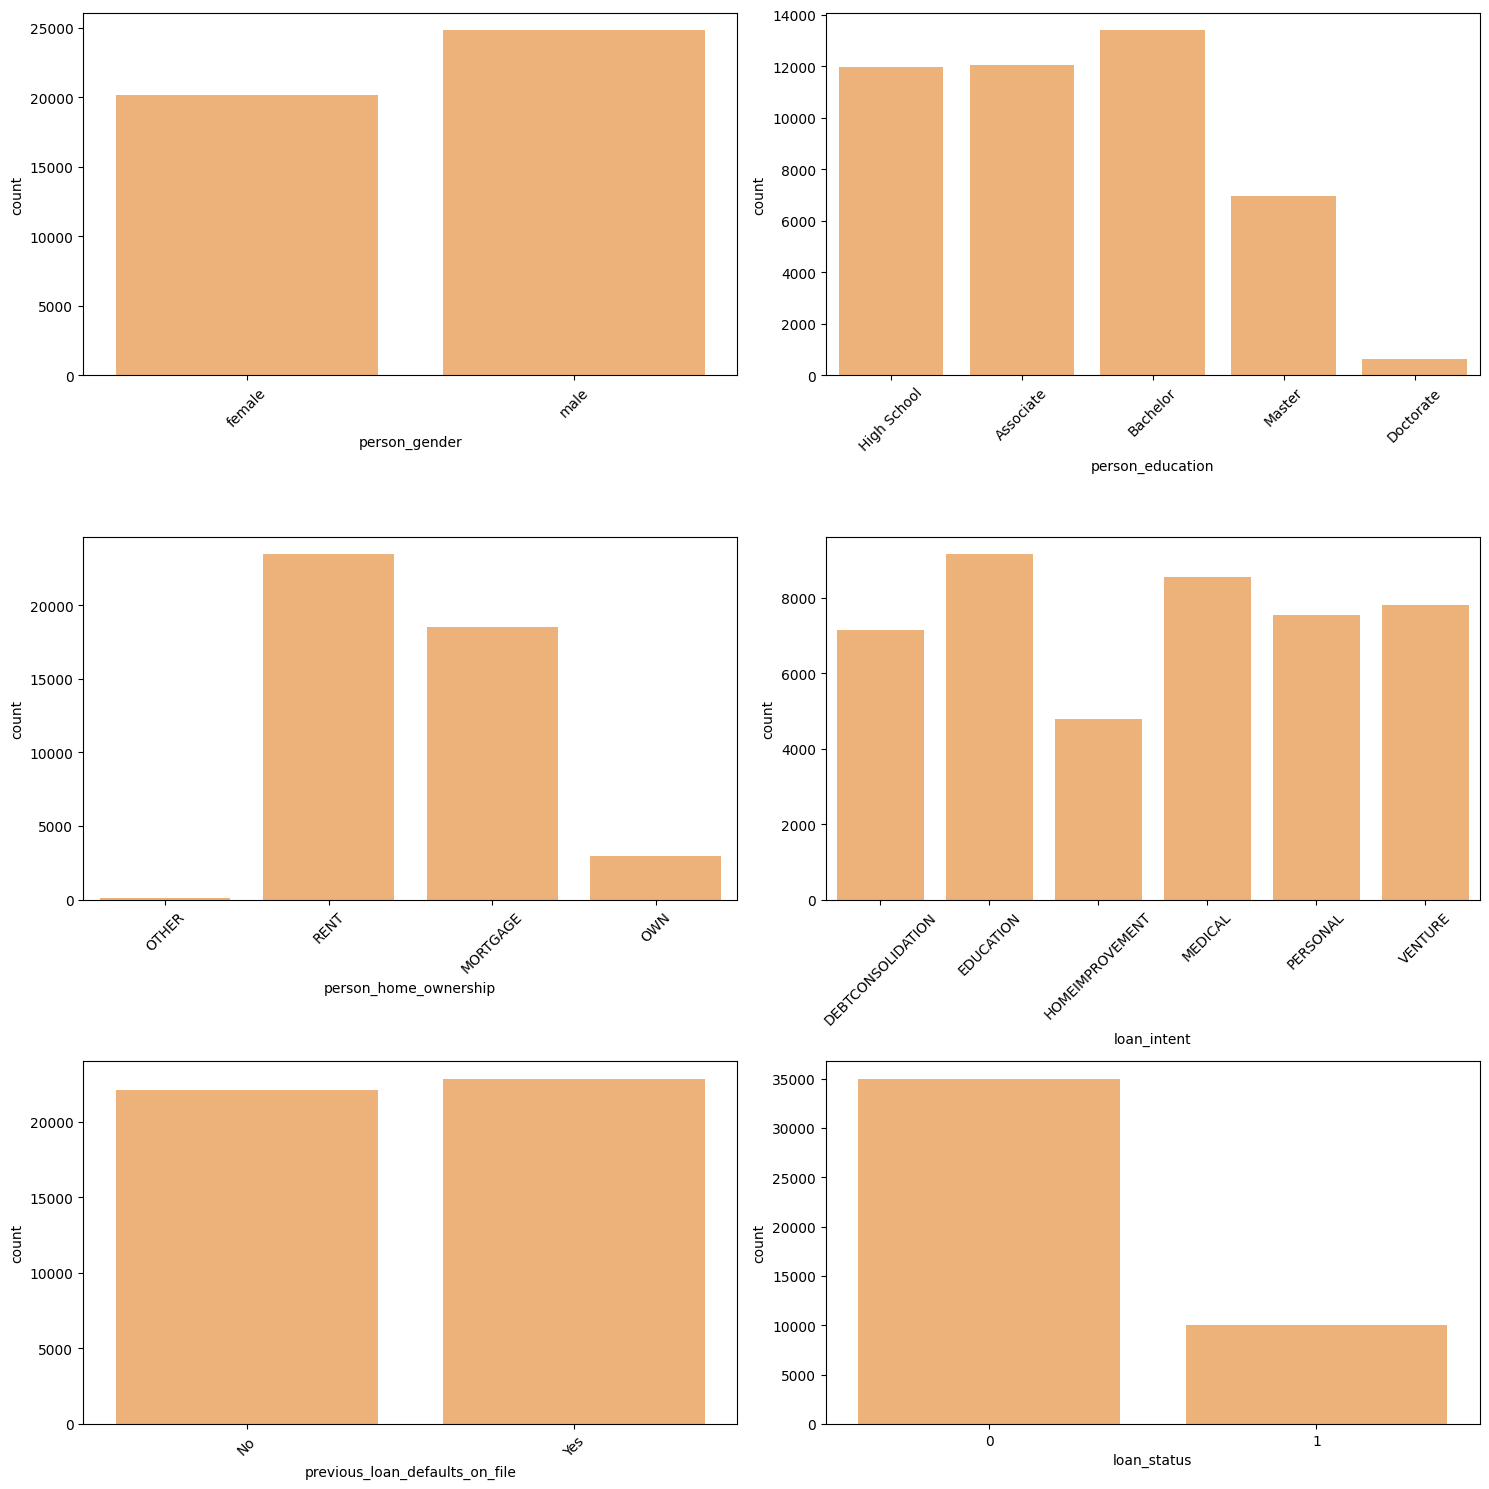

In [8]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()
# Get categorical columns
cat_cols = list(loan_data.select_dtypes(include='category').columns)

for col in cat_cols:
    sns.countplot(data=loan_data, x=col, ax=ax[cat_cols.index(col)], color = '#FFB266')
    ax[cat_cols.index(col)].tick_params(axis='x', rotation=45)

sns.countplot(data=loan_data, x='loan_status', ax=ax[5], color = '#FFB266')    
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


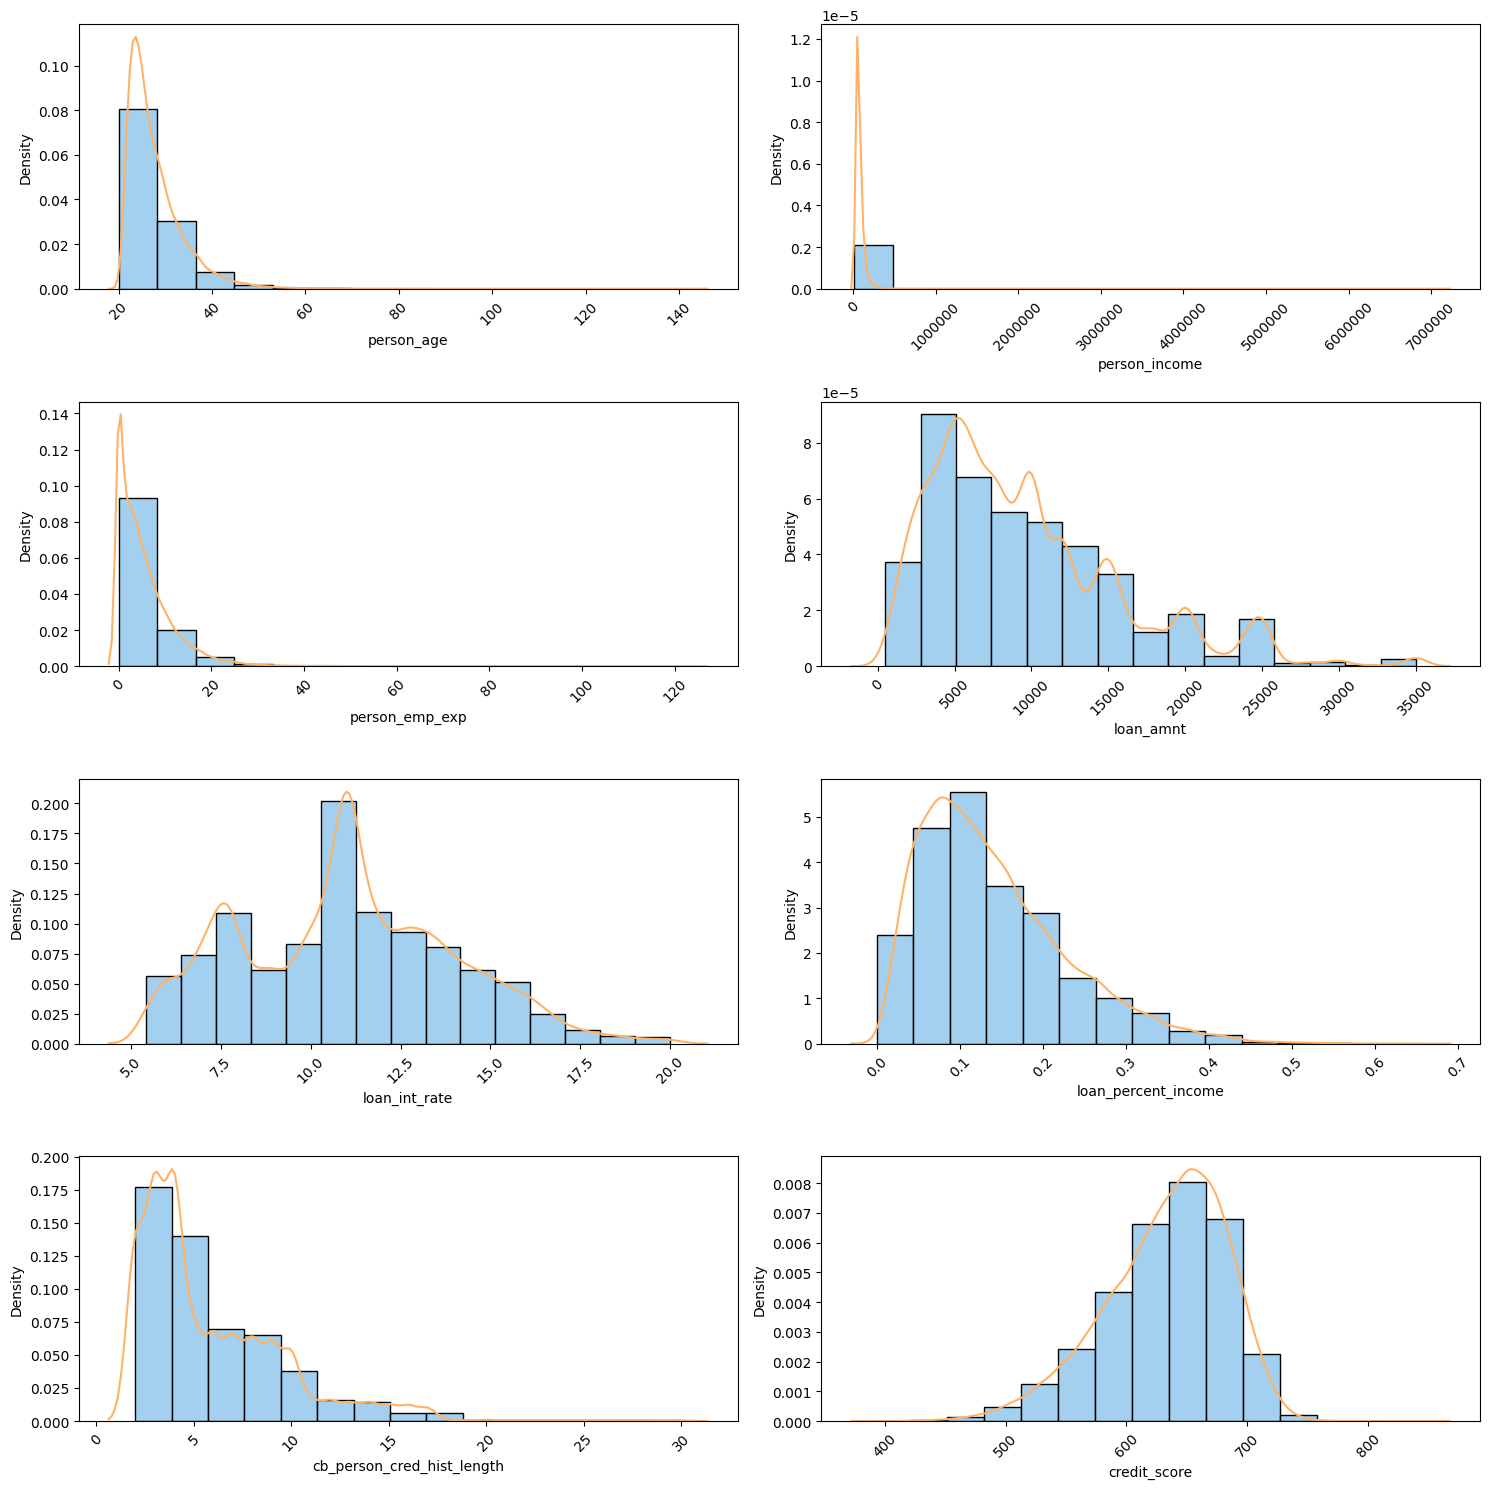

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))
ax = ax.flatten()

# Get numerical columns, excluding 'loan_status'
num_cols = list(loan_data.select_dtypes(include='number').columns)

for i, col in enumerate(num_cols):
    if col == 'loan_status':
        continue
    sns.histplot(data=loan_data, x=col, color = '#85c1e9', kde = False, stat = 'density', ax = ax[i], bins = 15)
    sns.kdeplot(data=loan_data, x=col, color = '#FFB266', ax=ax[i])
    
    ax[i].tick_params(axis='x', rotation=45) #Rotate x-axis labels to avoid overlap

    # Convert xaxis  to human readable format
    ax[i].get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax[i].get_xaxis().get_major_formatter().set_useOffset(False)
    ax[i].get_xaxis().get_major_formatter().set_scientific(False)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

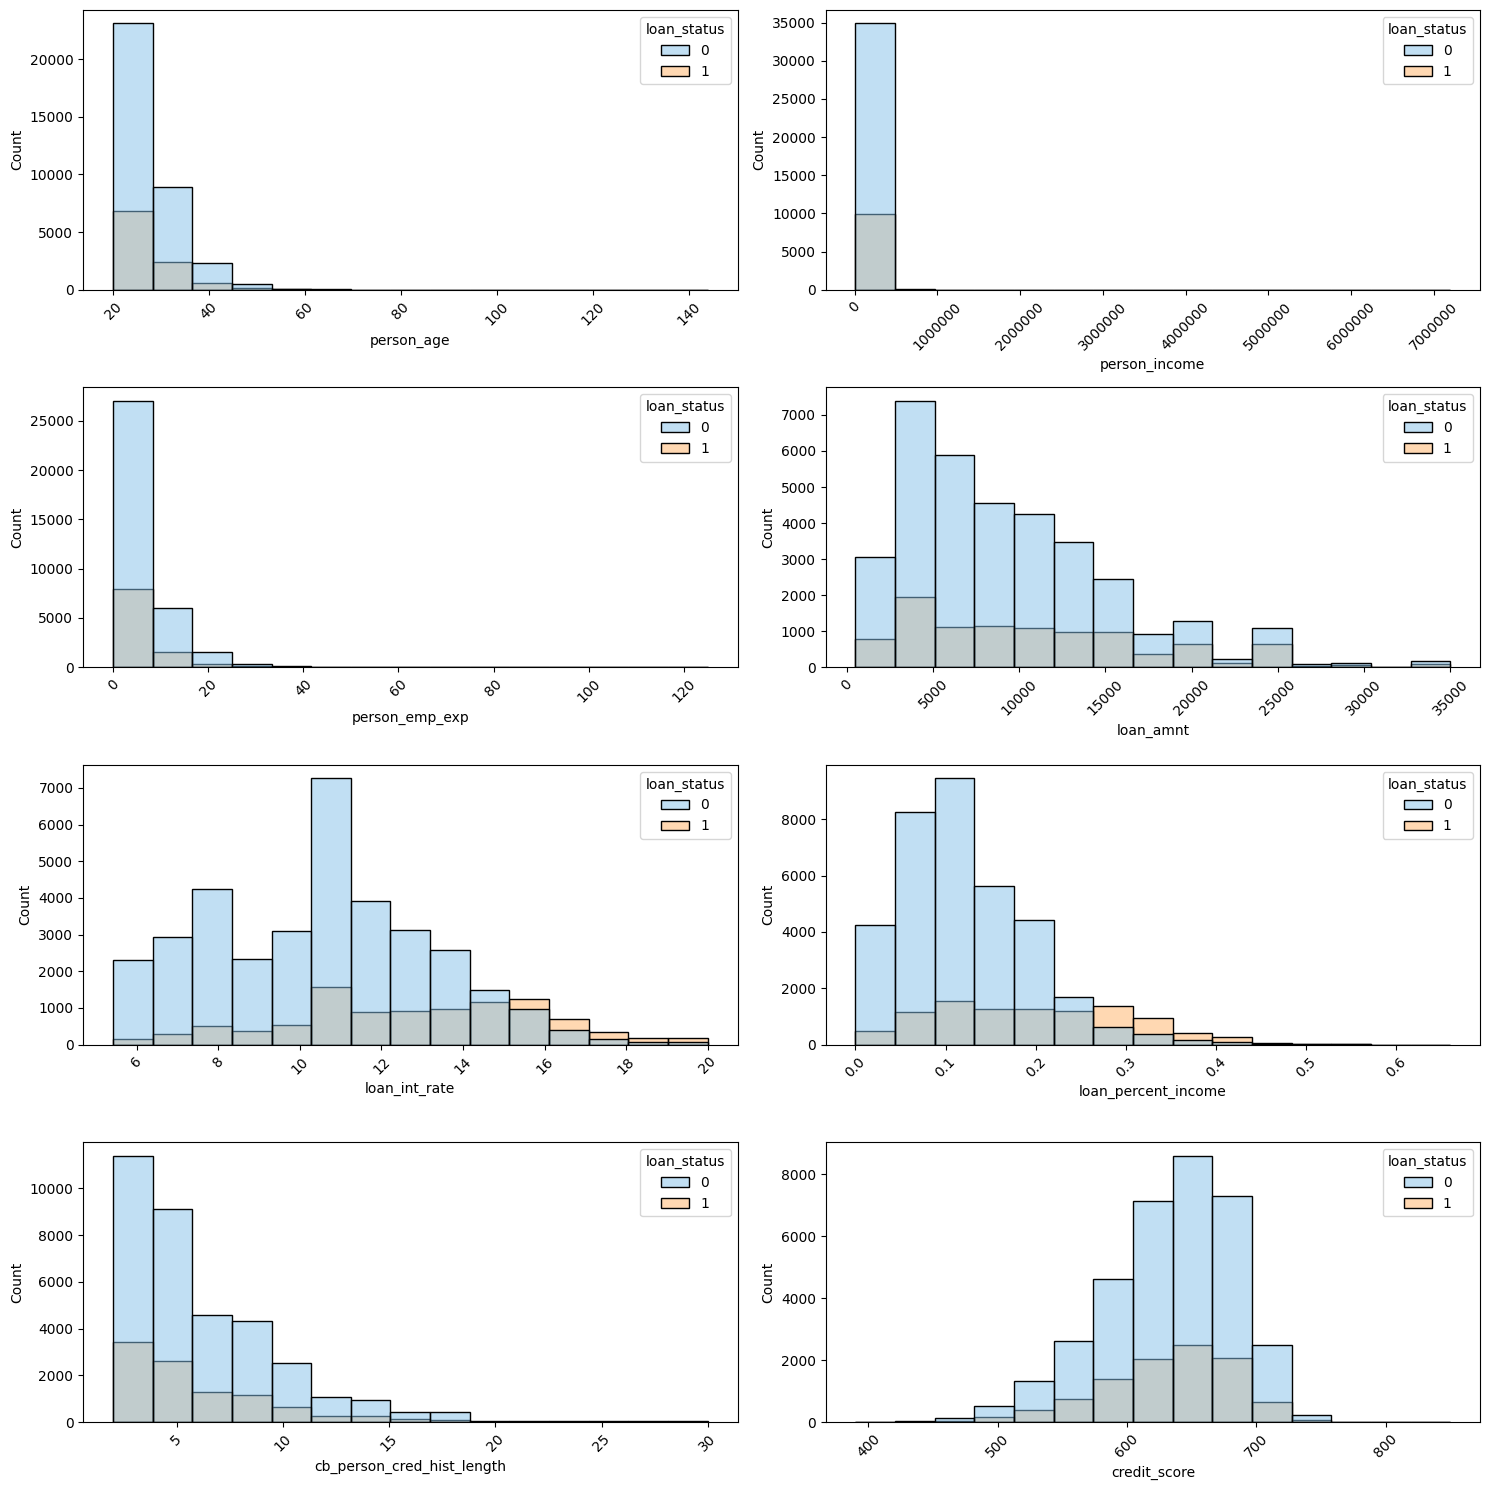

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))
ax = ax.flatten()

# Get numerical columns, excluding 'loan_status'
num_cols = list(loan_data.select_dtypes(include='number').drop(columns=['loan_status']).columns)

for i, col in enumerate(num_cols):
    sns.histplot(data=loan_data, x=col, hue='loan_status',ax = ax[i], palette = loan_status_colors, bins = 15) #Histogram plot but with different view of approval and rejection
    
    ax[i].tick_params(axis='x', rotation=45) #Rotate x-axis labels to avoid overlap
    
    # Convert xaxis  to human readable format
    ax[i].get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax[i].get_xaxis().get_major_formatter().set_useOffset(False)
    ax[i].get_xaxis().get_major_formatter().set_scientific(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [11]:
loan_data[num_cols].corrwith(loan_data['loan_status'].astype('float'), method = stats.pointbiserialr)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,-0.021476,-1.358077e-01,-0.020481,1.077145e-01,0.332005,0.38488,-0.014851,-0.007647
1,0.000005,3.483099e-184,0.000014,3.236704e-116,0.000000,0.00000,0.001631,0.104763


<p> The Table below presenting the Correlation of <span style='color:#85c1e9; font-weight:bold;'>numerical </span> with loan approval </p>
<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <tr>
        <th>Variable</th>
        <th>Correlation</th>
        <th>p-value (Second Row)</th>
        <th>Interpretation</th>
    </tr>
    <tr>
        <td>person_age</td>
        <td style="background-color: #e06666; color: black;">-0.021476</td>
        <td>0.000005</td>
        <td><i>Weak</i> negative correlation, but significant</td>
    </tr>
    <tr>
        <td>person_income</td>
        <td style="background-color: #e06666; color: black;">-0.135807</td>
        <td>3.48e-184</td>
        <td>Moderate negative correlation, highly significant</td>
    </tr>
    <tr>
        <td>loan_amnt</td>
        <td style="background-color: #93c47d; color: black;">0.107714</td>
        <td>3.24e-116</td>
        <td><i>Weak</i> positive correlation, highly significant</td>
    </tr>
    <tr>
        <td>loan_int_rate</td>
        <td style="background-color: #93c47d; color: black;">0.332005</td>
        <td>0.000000</td>
        <td><b>Strong</b> positive correlation, highly significant</td>
    </tr>
    <tr>
        <td>loan_percent_income</td>
        <td style="background-color: #93c47d; color: black;">0.384880</td>
        <td>0.000000</td>
        <td><b>Strong</b> positive correlation, highly significant</td>
    </tr>
    <tr>
        <td>credit_score</td>
        <td style="background-color: #e06666; color: black;">-0.007647</td>
        <td>0.104763</td>
        <td>Very weak correlation, not significant</td>
    </tr>
</table>
<p><br> The histograms and correlation matrix both suggest that <span style = 'color: #93c47d'> higher </span> <span style='color:#85c1e9; font-weight:bold;'>interest rate </span> and <span style='color:#85c1e9; font-weight:bold;'>percentage of loan over income </span> result in <span style = 'color: #93c47d'> higher </span> chance of loan being approved</p>

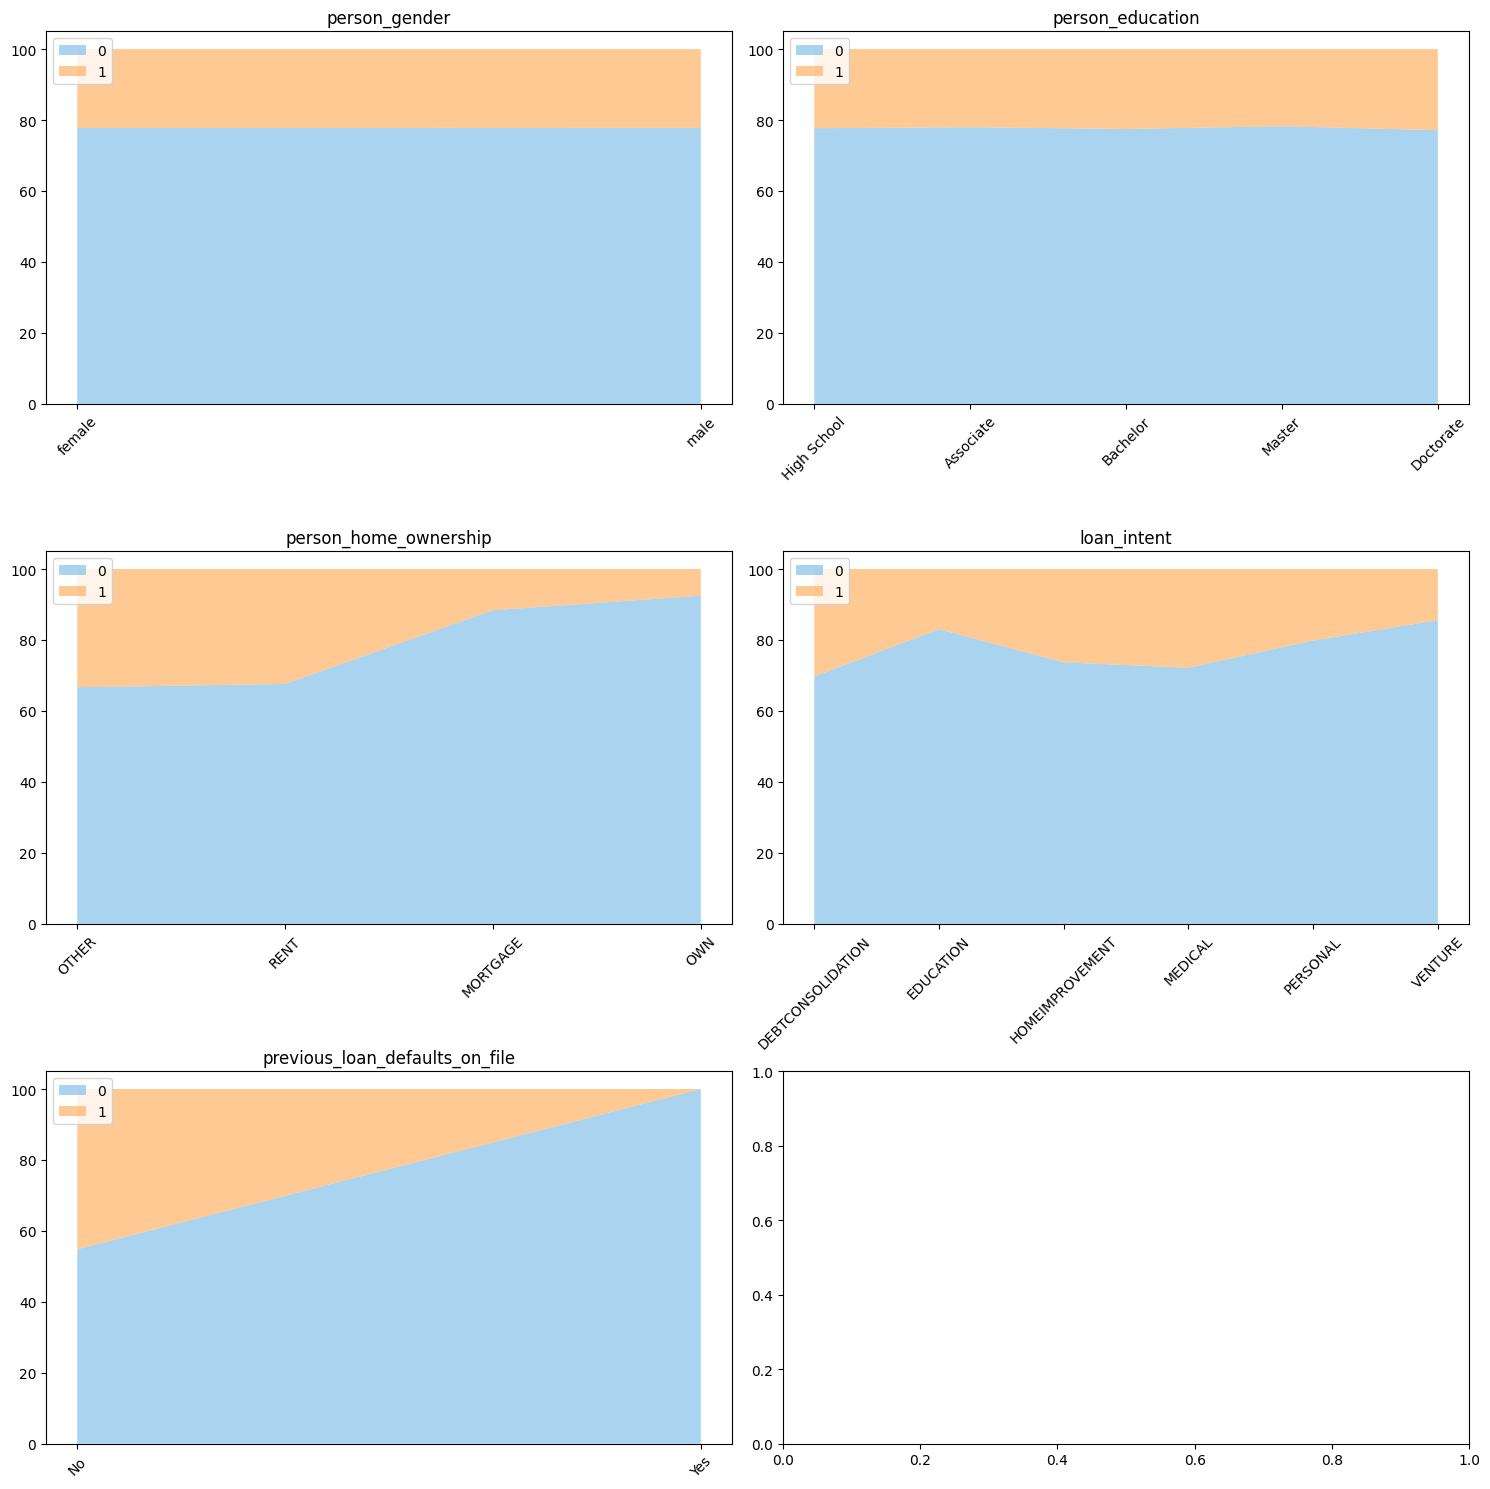

In [12]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()
# Get categorical columns
cat_cols = list(loan_data.select_dtypes(include='category').columns)

for i, col in enumerate(cat_cols):
    temp_df = loan_data.groupby([col, 'loan_status'], observed = False).size().reset_index(name='count')
    temp_df['percentage'] = temp_df['count'] / temp_df.groupby(col, observed = False)['count'].transform('sum') * 100
    pivot_df = temp_df.pivot(index = col, columns ='loan_status', values='percentage')
    colors = [loan_status_colors[status] for status in pivot_df.columns] #Set color following color scheme
    ax[i].stackplot(pivot_df.index, pivot_df.T, labels = pivot_df.columns, colors = colors, alpha = 0.7)
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(loc='upper left')
    ax[i].title.set_text(f'{col}')
plt.tight_layout()
plt.show()

<p> The acceptance rate shows no discrimination regarding <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>gender </span> and <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>level of education </span> </p>
<p> However, <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>house owner </span> or <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>mortgage </span> are less likely to be approved.</p>
<p> Regarding <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>loan intention </span>, education, personal, and venture purpose got lower approval rate. </p>
<p> It is clearly that banks perceive people who failed to fulfill there historical loan as risks and refuse to proceed to the loan </p>

# Predictive Modeling
## Data Preprocessing
### Data normalization

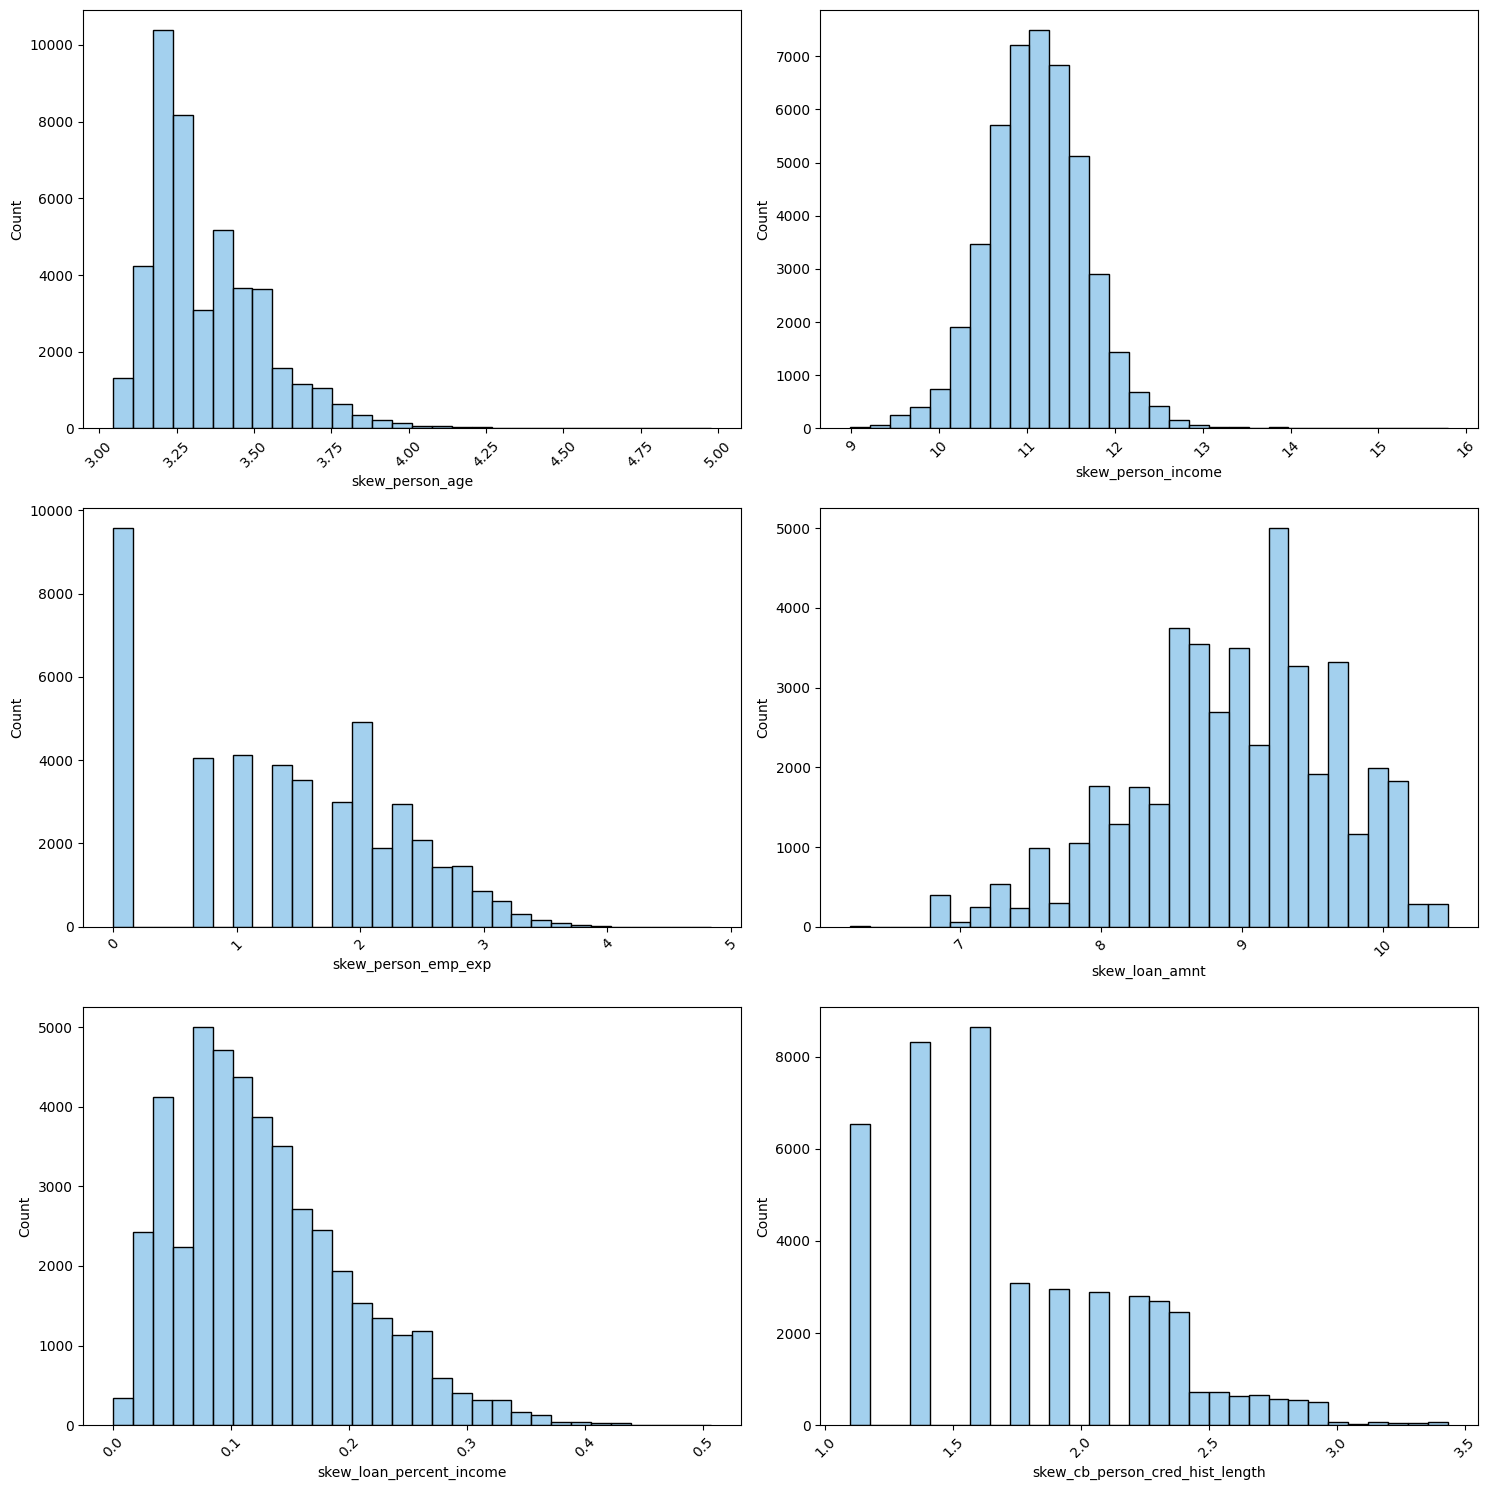

In [13]:
skew_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()
for i, col in enumerate(skew_columns):
    loan_data['skew_'+col] = loan_data[col].apply(lambda x: np.log(x+1))
    sns.histplot(data=loan_data, x='skew_'+col, ax = ax[i], kde = False, color = '#85c1e9', bins =30)
    ax[i].tick_params(axis='x', rotation=45) #Rotate x-axis labels to avoid overlap

    # Convert xaxis  to human readable format
    ax[i].get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax[i].get_xaxis().get_major_formatter().set_useOffset(False)
    ax[i].get_xaxis().get_major_formatter().set_scientific(False)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Import Machine Learning Library

In [14]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Preprocessing

In [15]:
random.seed(15) #Set random seed for reproducibility
# Seperate features and target variable
X = loan_data.drop(columns = ['loan_status']+ skew_columns)
y = loan_data['loan_status']

#Create dummy variables for categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore').set_output(transform='pandas')
df_encoded = encoder.fit_transform(X[cat_cols])
X = pd.concat([X.drop(columns = cat_cols), df_encoded], axis=1)

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
def plot_conf_matrix(y_test, y_pred, model_name):
    class_names=[0,1] # name  of classes
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix of' + model_name, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### Logistics Regression

In [17]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train) #fit the model with the data
y_pred_logreg = logreg.predict(X_test) #Predict the target variable
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1] #Predict the probability of target variable
cnf_matrix = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[6626,  414],
       [ 483, 1477]], dtype=int64)

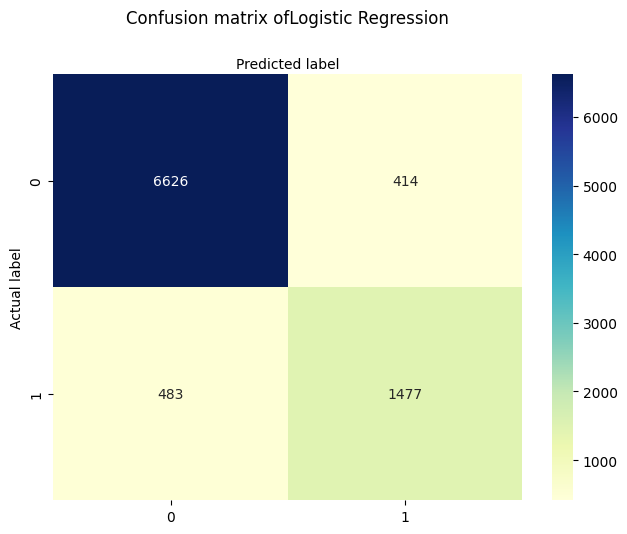

In [18]:
plot_conf_matrix(y_test, y_pred_logreg, 'Logistic Regression')

In [19]:
results = []
results.append({
    "Model": 'Logistic Regression',
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg),
    "Recall": recall_score(y_test, y_pred_logreg),
    "F1-score": f1_score(y_test, y_pred_logreg),
    "AUC-ROC": roc_auc_score(y_test, y_pred_prob_logreg)
    })

### Decision Tree

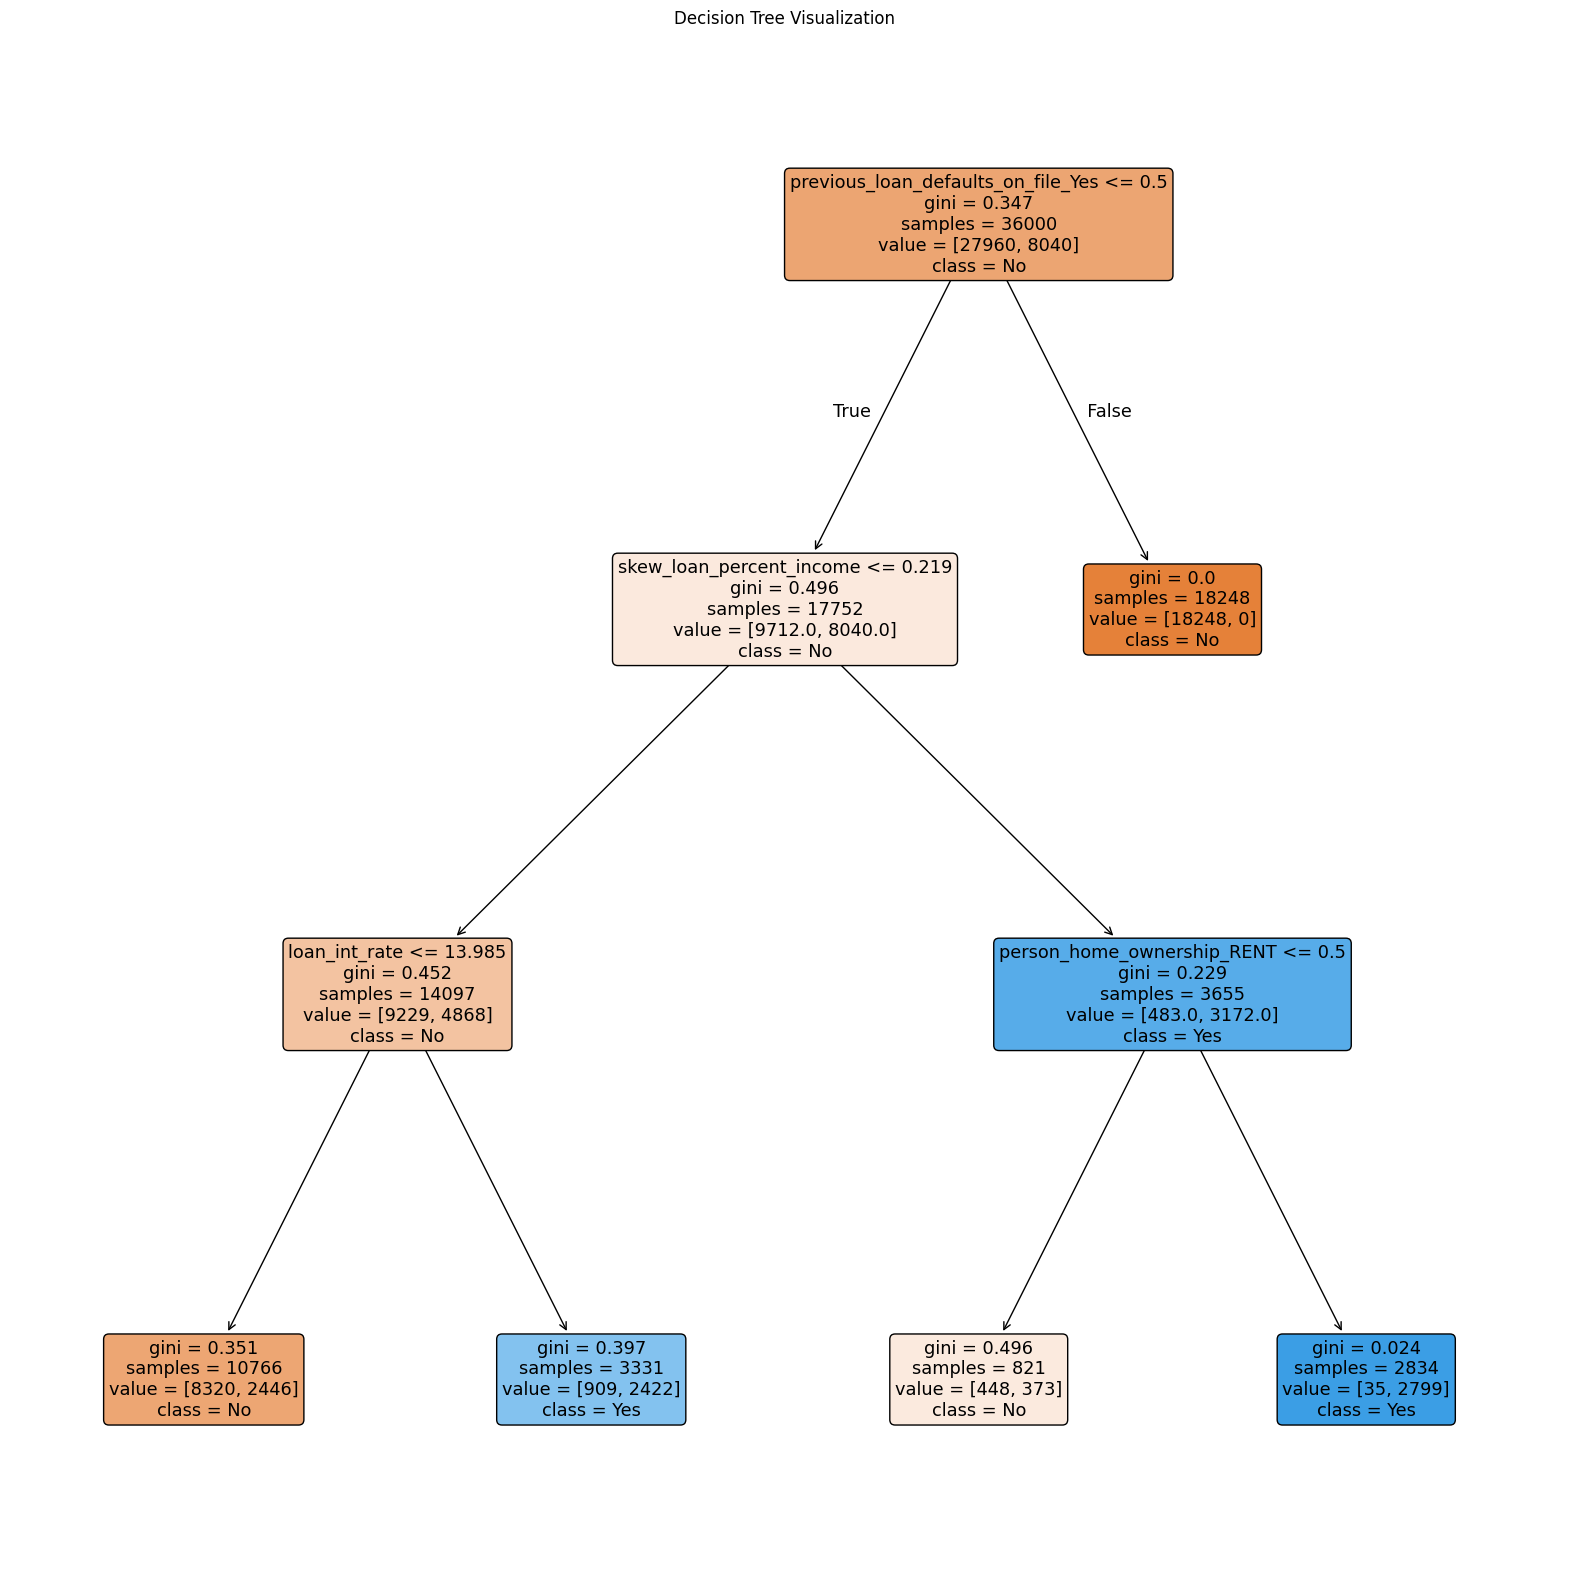

In [20]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:,1]
plt.figure(figsize=(20, 20))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

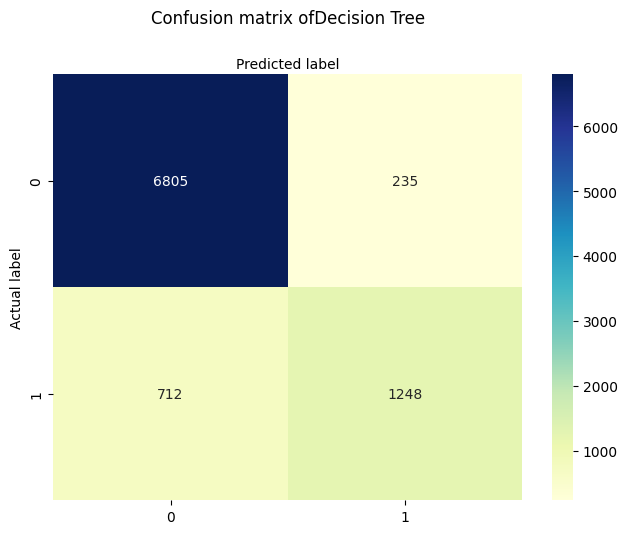

In [21]:
plot_conf_matrix(y_test, y_pred_dt, 'Decision Tree')

In [22]:
results.append({
    "Model": 'Decision Tree(Depth 3)',
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1-score": f1_score(y_test, y_pred_dt),
    "AUC-ROC": roc_auc_score(y_test, y_pred_prob_dt)
    })

In [23]:
pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.900333,0.781068,0.753571,0.767073,0.956286
1,Decision Tree(Depth 3),0.894778,0.841537,0.636735,0.724949,0.928951
